# 4. Modelo Preliminar

**Objetivo:** ver que el dataframe funciona correctamente con un modelo y así verificar que se peuden sacar inferencias correctas para posteriormente realizar distintas pruebas en distintos modelos y selecionar el mejor (en el notebook 6_barrido_modelos)

## 1. Random Forest

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("ultimate.csv")

X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,      
    random_state=42,    
    shuffle=True
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)



Accuracy: 0.99
Matriz de Confusión:
[[1514    1    9    3    3   47]
 [   4 2753    0    3    0    5]
 [   4    0  381    0    0    0]
 [   2    2    0 4827    2    1]
 [  12    0    1    3 4810    4]
 [   7    3    2    1   10 2386]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.96      0.97      1577
              imbalance       1.00      1.00      1.00      2765
                 normal       0.97      0.99      0.98       385
               overhang       1.00      1.00      1.00      4834
              underhang       1.00      1.00      1.00      4830
  vertical-misalignment       0.98      0.99      0.98      2409

               accuracy                           0.99     16800
              macro avg       0.99      0.99      0.99     16800
           weighted avg       0.99      0.99      0.99     16800



## 4.2 Importancia de características

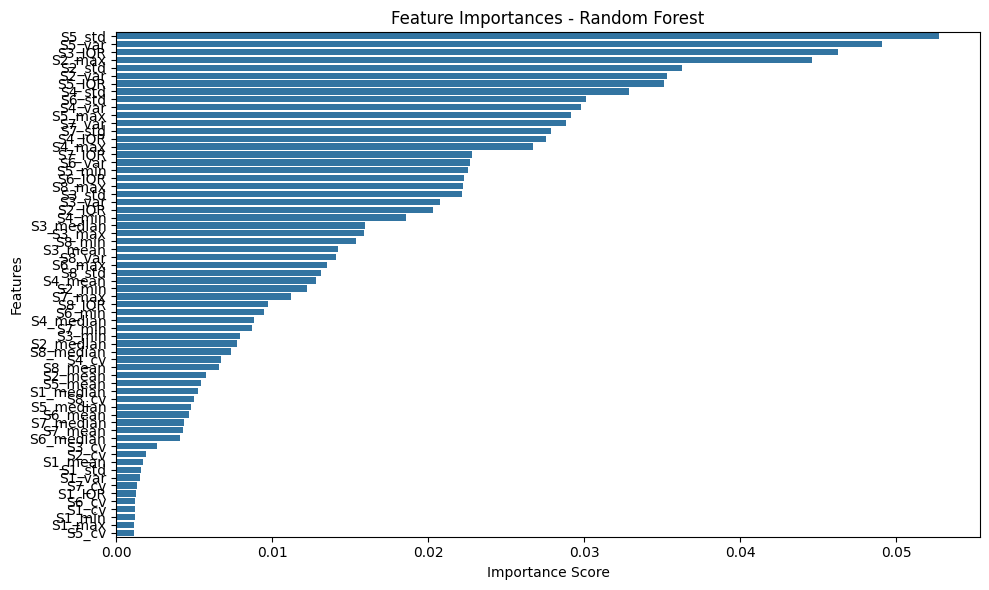

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = model.feature_importances_

feature_importance_series = pd.Series(importances, index=X_train.columns)

feature_importance_series = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## 4.3  Primera prueba para evitar overfiting

Hemos tomado la decisión de eliminar los fallos correspondientes a los rodamientos de 6g de diferentes tipos de fallos.

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("ultimate.csv")


df_train = df[df["medida"] != "6g"]  
df_test  = df[df["medida"] == "6g"]  


X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)


Accuracy (test con 'medida' = 6g): 0.96
Matriz de Confusión:
[[   0    0    0    0    0    0]
 [   0 1946   35    0    0   19]
 [   0    0    0    0    0    0]
 [  31   87   65 5727   57   33]
 [  15    0    7  146 5806   26]
 [   0    0    0    0    0    0]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.00      0.00      0.00         0
              imbalance       0.96      0.97      0.97      2000
                 normal       0.00      0.00      0.00         0
               overhang       0.98      0.95      0.96      6000
              underhang       0.99      0.97      0.98      6000
  vertical-misalignment       0.00      0.00      0.00         0

               accuracy                           0.96     14000
              macro avg       0.49      0.48      0.48     14000
           weighted avg       0.98      0.96      0.97     14000



c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aanaj\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4.4 Segunda prueba para evitar overfitting

Con el fin de reducir en mayor medida el overfitting si cabe, hemos tomado al decisión de además de eliminar los distintos fallos correspondoentes a los rodamiento de 6g, eliminar también los de 1.40mm y 1.5mm.

Esta decisión ha sido finalmente desechada, ya que la eliminación de tantos fallos distintos podría confundir al modelo, por lo que como se verá en el notebook '6_barrido_modelos' solo se eliminará del conjutno de entrenamiento los distintos fallos correspondientes a los rodamiento de 6g.

Accuracy (test con 'medida' = 6g, '1.5mm', '1.40mm'): 0.98
Matriz de Confusión:
[[ 7196     3   344   193   154   110]
 [    0 13955    36     0     0     9]
 [    0     0  2000     0     0     0]
 [   29    68   114 23687    70    32]
 [    6     0     8   177 23764    45]
 [    5     1     0     4     0 11990]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.99      0.90      0.94      8000
              imbalance       0.99      1.00      1.00     14000
                 normal       0.80      1.00      0.89      2000
               overhang       0.98      0.99      0.99     24000
              underhang       0.99      0.99      0.99     24000
  vertical-misalignment       0.98      1.00      0.99     12000

               accuracy                           0.98     84000
              macro avg       0.96      0.98      0.97     84000
           weighted avg       0.98      0.98      0.98     84000



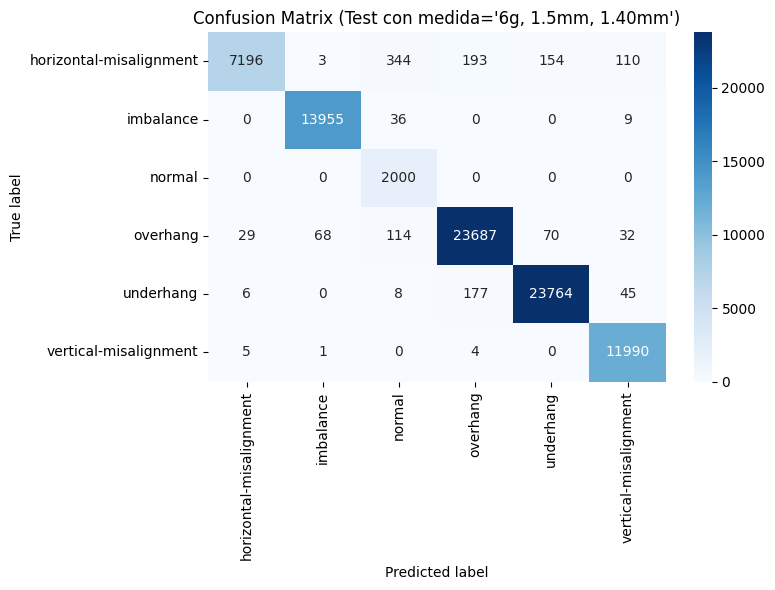

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("ultimate.csv")

df_train = df[(df["medida"] != "6g") & (df["medida"] != "1.5mm") & (df["medida"] != "1.40mm") & (df["medida"] != 0)]  # Para entrenar
df_test  = df[(df["medida"] == "6g") | (df["medida"] == "1.5mm") | (df["medida"] == "1.40mm") | (df["medida"] != 0)]  # Para probar

X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g, '1.5mm', '1.40mm'): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

labels = sorted(model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g, 1.5mm, 1.40mm')")
plt.tight_layout()
plt.show()
